In [15]:
import torch
import torchaudio
from einops import repeat
from snac import SNAC

In [16]:
device = "cuda"

In [17]:
codec = SNAC.from_pretrained("hubertsiuzdak/snac_24khz").eval().to(device)
codec_sample_rate = 24000

In [18]:
!wget -nc https://huggingface.co/coqui/XTTS-v2/resolve/main/samples/en_sample.wav

File ‘en_sample.wav’ already there; not retrieving.



In [19]:
waveform, sample_rate = torchaudio.load("en_sample.wav")

In [20]:
waveform.shape

torch.Size([1, 74752])

In [21]:
B = 8
# waveforms = torch.randn(B, 1, 10 * codec_sample_rate, device=device)
waveforms = repeat(waveform, "C T -> B C T", B=B).to(device)

In [22]:
with torch.inference_mode():
    codes = codec.encode(waveforms)

In [23]:
[c.size(-1) for c in codes]

[37, 74, 148]

In [24]:
import matplotlib.pyplot as plt

24000 -> 24576
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
l

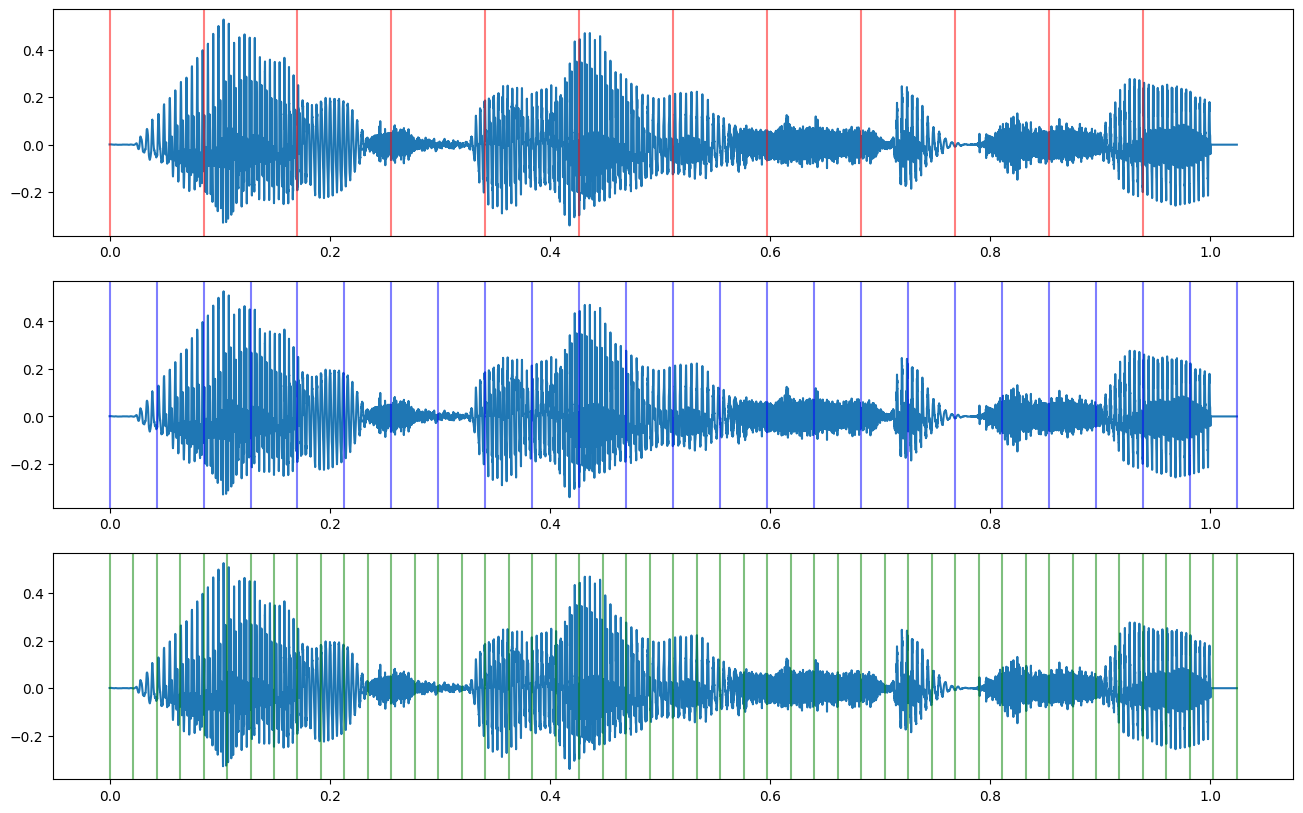

In [30]:
segment = waveform[..., :sample_rate].unsqueeze(0).to(device)
before = segment.size(-1)
segment = codec.preprocess(segment)
after = segment.size(-1)
print(f"{before} -> {after}")
with torch.inference_mode():
    codes = codec.encode(segment)

segment = segment.squeeze(0).cpu()

n_samples = segment.size(-1)
duration = n_samples / sample_rate
colors = ["red", "blue", "green"]
fig, axs = plt.subplots(3, 1, figsize=(16, 10))
for i, (c, color) in enumerate(zip(codes, colors)):
    n_tokens = c.size(-1)
    interval = duration / n_tokens
    t = 0
    axs[i].plot(torch.arange(n_samples) / sample_rate, segment[0].cpu())
    while t < duration:
        axs[i].axvline(t, color=color, alpha=0.5)
        t += interval
        print(f"level={i} interval={1000* interval:.1f}ms")

4800 -> 6144
3
level=0 interval=85.3ms
level=0 interval=85.3ms
level=0 interval=85.3ms
6
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
level=1 interval=42.7ms
12
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms
level=2 interval=21.3ms


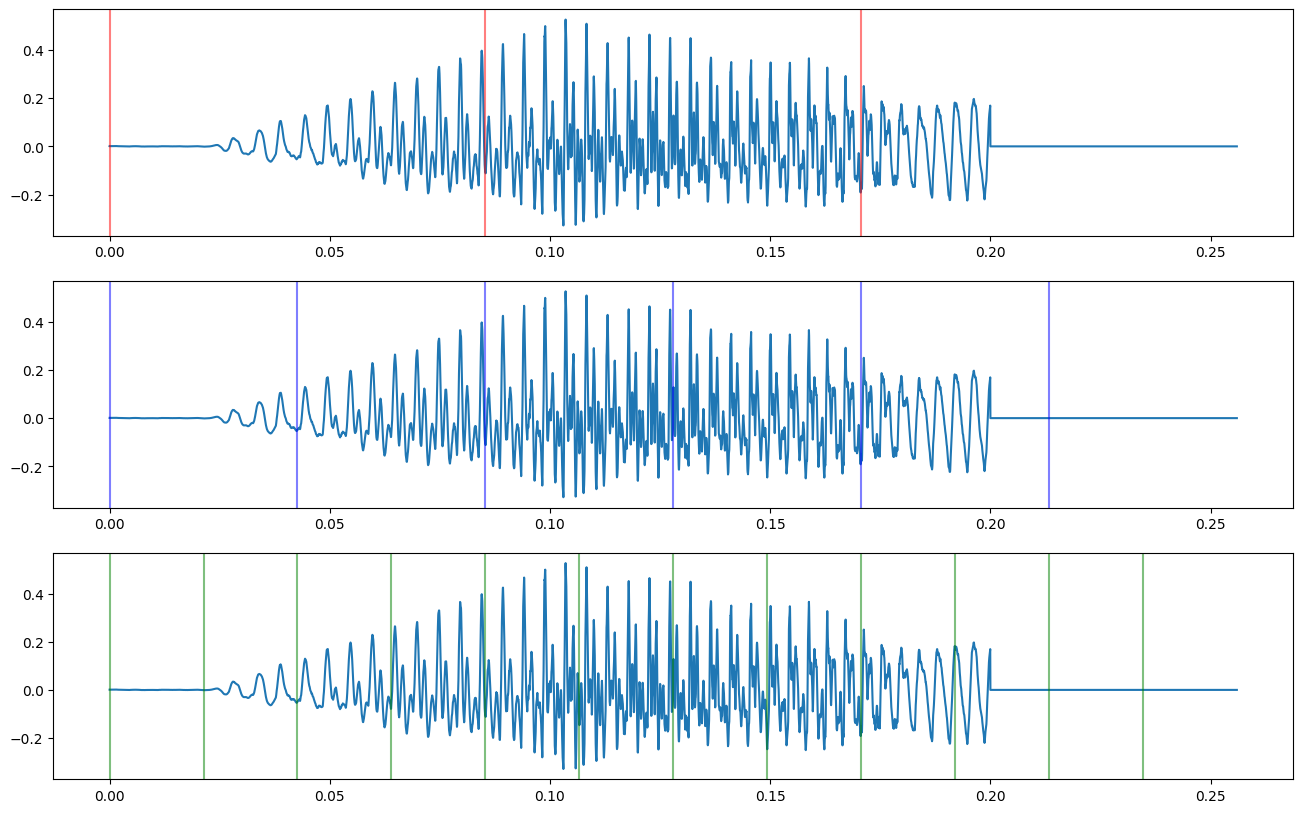

In [32]:
duration = 0.200
segment = waveform[..., :int(duration * sample_rate)].unsqueeze(0).to(device)
before = segment.size(-1)
segment = codec.preprocess(segment)
after = segment.size(-1)
print(f"{before} -> {after}")

with torch.inference_mode():
    codes = codec.encode(segment)

segment = segment.squeeze(0).cpu()

n_samples = segment.size(-1)
duration = n_samples / sample_rate
colors = ["red", "blue", "green"]
fig, axs = plt.subplots(3, 1, figsize=(16, 10))
for i, (c, color) in enumerate(zip(codes, colors)):
    n_tokens = c.size(-1)
    print(n_tokens)
    interval = duration / n_tokens
    t = 0
    axs[i].plot(torch.arange(n_samples) / sample_rate, segment[0].cpu())
    while t < duration:
        axs[i].axvline(t, color=color, alpha=0.5)
        t += interval
        print(f"level={i} interval={1000* interval:.1f}ms")